In [3]:
# Reads the potential training data & sets up a neural network w/ 2 hidden layers

import csv
import numpy as np
import tensorflow as tf


bins = 128
seedmax = 1 # opens seed files 0 - 19
trainx = []
trainy = []
validx = []
validy = []

#python needs pointers
for k in range(seedmax):
    with open('test_pots'+str(k)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            trainx.append([float(num) for num in row])
    with open('test_out'+str(k)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            trainy.append([float(num) for num in row])
    with open('valid_pots'+str(k)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            validx.append([float(num) for num in row])
    with open('valid_out'+str(k)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            validy.append([float(num) for num in row])

seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)
#have a decaying learning rate so that convergence is faster at first and the fit is better at the end.
#However, by trial and error, the simple exponential decay doesn't work well.
#Trying a method by which the decay happens at hand-specified intervals
startrate = 0.125
gs = 0
gslist = [1,1,2,3,10,20,40,100,200,10000]
ic = 0
learnrate = tf.Variable(startrate, trainable=False)
updatelearnrate = tf.assign(learnrate,tf.multiply(learnrate,0.75))
# set up neural network layers. There are shorter ways to do it, but this exposes the guts.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
#1st hidden layer
W1 = tf.Variable(tf.random_uniform([bins-1, bins-1], -1./bins, 1./bins))
B1 = tf.Variable(tf.random_uniform([bins-1], -1., 1.))
L1 = tf.nn.softplus(tf.matmul(X, W1) + B1)
#2nd hidden layer
W2 = tf.Variable(tf.random_uniform([bins-1, bins-1], -1./bins, 1./bins))
B2 = tf.Variable(tf.random_uniform([bins-1], -1., 1.))
L2 = tf.nn.softplus(tf.matmul(L1, W2) + B2)
#Output layer
W3 = tf.Variable(tf.random_uniform([bins-1, bins-1], -1./bins, 1./bins))
B3 = tf.Variable(tf.random_uniform([bins-1], -1., 1.))
L3 = tf.nn.softplus(tf.matmul(L2, W3) + B3)
#Cost function
costfunc = tf.reduce_mean(tf.square(tf.subtract(L3,Y)))
optimizer = tf.train.GradientDescentOptimizer(learnrate)
trainstep = optimizer.minimize(costfunc)
#initialize
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(100000):
    if step % 150 == 0:
        if ic == gslist[gs]:
            gs = gs + 1
            ic = 1
            sess.run(updatelearnrate)
        else:
            ic = ic + 1
    if step %100 == 0:
        print step, 'Train loss: ',sess.run(costfunc,feed_dict={X: trainx, Y: trainy}), 'Valid loss: ',sess.run(costfunc,feed_dict={X: validx, Y: validy})
    sess.run(trainstep, feed_dict={X: trainx, Y: trainy})


0 Train loss:  0.4440678 Valid loss:  0.4343995
100 Train loss:  0.11149939 Valid loss:  0.124380775
200 Train loss:  0.07451732 Valid loss:  0.10803318
300 Train loss:  0.048124477 Valid loss:  0.09010908
400 Train loss:  0.029711232 Valid loss:  0.080451034
500 Train loss:  0.030314192 Valid loss:  0.075510435
600 Train loss:  0.023939198 Valid loss:  0.07500907
700 Train loss:  0.017582474 Valid loss:  0.057471324
800 Train loss:  0.016281148 Valid loss:  0.0630246
900 Train loss:  0.014953014 Valid loss:  0.06083543
1000 Train loss:  0.013967542 Valid loss:  0.059987385
1100 Train loss:  0.010891441 Valid loss:  0.049621657
1200 Train loss:  0.010724099 Valid loss:  0.050272938
1300 Train loss:  0.010503332 Valid loss:  0.052171074
1400 Train loss:  0.009837647 Valid loss:  0.04999168
1500 Train loss:  0.009747493 Valid loss:  0.048414174
1600 Train loss:  0.009648587 Valid loss:  0.04680336
1700 Train loss:  0.009297052 Valid loss:  0.044409502
1800 Train loss:  0.008952156 Valid 

14800 Train loss:  0.0013382959 Valid loss:  0.04628309
14900 Train loss:  0.0013310167 Valid loss:  0.046292547
15000 Train loss:  0.0013238022 Valid loss:  0.046301663
15100 Train loss:  0.0013166541 Valid loss:  0.046310507
15200 Train loss:  0.0013095697 Valid loss:  0.046319053
15300 Train loss:  0.0013025514 Valid loss:  0.046327293
15400 Train loss:  0.0012955966 Valid loss:  0.046335198
15500 Train loss:  0.0012887046 Valid loss:  0.046342786
15600 Train loss:  0.0012818743 Valid loss:  0.046350107
15700 Train loss:  0.0012751044 Valid loss:  0.04635712
15800 Train loss:  0.0012683951 Valid loss:  0.046363972
15900 Train loss:  0.0012617457 Valid loss:  0.046370532
16000 Train loss:  0.0012551539 Valid loss:  0.04637694
16100 Train loss:  0.0012486217 Valid loss:  0.046383217
16200 Train loss:  0.0012421443 Valid loss:  0.046389267
16300 Train loss:  0.0012357238 Valid loss:  0.04639483
16400 Train loss:  0.0012293659 Valid loss:  0.046394307
16500 Train loss:  0.0012257211 Val

29300 Train loss:  0.0007378149 Valid loss:  0.047586147
29400 Train loss:  0.0007359659 Valid loss:  0.04759527
29500 Train loss:  0.00073412666 Valid loss:  0.047604486
29600 Train loss:  0.0007322972 Valid loss:  0.047613643
29700 Train loss:  0.00073047786 Valid loss:  0.04762285
29800 Train loss:  0.00072866736 Valid loss:  0.04763207
29900 Train loss:  0.00072686566 Valid loss:  0.047641184
30000 Train loss:  0.00072507426 Valid loss:  0.047650322
30100 Train loss:  0.0007232909 Valid loss:  0.047659513
30200 Train loss:  0.00072151783 Valid loss:  0.04766871
30300 Train loss:  0.0007197519 Valid loss:  0.047677863
30400 Train loss:  0.00071799575 Valid loss:  0.04768711
30500 Train loss:  0.00071624824 Valid loss:  0.047696363
30600 Train loss:  0.00071450986 Valid loss:  0.04770557
30700 Train loss:  0.00071277906 Valid loss:  0.047714747
30800 Train loss:  0.00071105687 Valid loss:  0.047723982
30900 Train loss:  0.0007093437 Valid loss:  0.047733247
31000 Train loss:  0.00070

43700 Train loss:  0.0005407303 Valid loss:  0.049084764
43800 Train loss:  0.0005397207 Valid loss:  0.049095504
43900 Train loss:  0.0005387142 Valid loss:  0.0491063
44000 Train loss:  0.00053771085 Valid loss:  0.049117092
44100 Train loss:  0.0005367124 Valid loss:  0.04912786
44200 Train loss:  0.0005357172 Valid loss:  0.049138617
44300 Train loss:  0.0005347249 Valid loss:  0.049149383
44400 Train loss:  0.0005337362 Valid loss:  0.049160197
44500 Train loss:  0.0005327519 Valid loss:  0.049170956
44600 Train loss:  0.0005317701 Valid loss:  0.04918171
44700 Train loss:  0.0005307922 Valid loss:  0.049192544
44800 Train loss:  0.0005298178 Valid loss:  0.04920334
44900 Train loss:  0.0005288463 Valid loss:  0.04921419
45000 Train loss:  0.00052787864 Valid loss:  0.04922502
45100 Train loss:  0.00052691385 Valid loss:  0.049235947
45200 Train loss:  0.0005259525 Valid loss:  0.049246766
45300 Train loss:  0.00052499474 Valid loss:  0.049257677
45400 Train loss:  0.0005240401 Va

58100 Train loss:  0.00042822186 Valid loss:  0.05065303
58200 Train loss:  0.00042774077 Valid loss:  0.050661013
58300 Train loss:  0.0004272605 Valid loss:  0.050668977
58400 Train loss:  0.0004267815 Valid loss:  0.05067693
58500 Train loss:  0.00042630438 Valid loss:  0.050684877
58600 Train loss:  0.0004258276 Valid loss:  0.050692786
58700 Train loss:  0.00042535225 Valid loss:  0.050700665
58800 Train loss:  0.00042487806 Valid loss:  0.05070853
58900 Train loss:  0.0004244052 Valid loss:  0.050716355
59000 Train loss:  0.0004239337 Valid loss:  0.050724164
59100 Train loss:  0.00042346295 Valid loss:  0.050731916
59200 Train loss:  0.0004229932 Valid loss:  0.050739694
59300 Train loss:  0.0004225247 Valid loss:  0.050747413
59400 Train loss:  0.00042205732 Valid loss:  0.050755113
59500 Train loss:  0.00042159043 Valid loss:  0.050762773
59600 Train loss:  0.00042112486 Valid loss:  0.05077038
59700 Train loss:  0.0004206609 Valid loss:  0.050777953
59800 Train loss:  0.00042

72400 Train loss:  0.00036864725 Valid loss:  0.05173585
72500 Train loss:  0.00036828217 Valid loss:  0.05174438
72600 Train loss:  0.00036791762 Valid loss:  0.05175298
72700 Train loss:  0.0003675539 Valid loss:  0.051761568
72800 Train loss:  0.00036719046 Valid loss:  0.051770147
72900 Train loss:  0.00036682808 Valid loss:  0.05177876
73000 Train loss:  0.00036646676 Valid loss:  0.051787384
73100 Train loss:  0.00036610576 Valid loss:  0.05179606
73200 Train loss:  0.00036574595 Valid loss:  0.051804792
73300 Train loss:  0.00036538666 Valid loss:  0.051813457
73400 Train loss:  0.0003650288 Valid loss:  0.05182221
73500 Train loss:  0.00036467178 Valid loss:  0.051831007
73600 Train loss:  0.0003643152 Valid loss:  0.051839802
73700 Train loss:  0.00036396008 Valid loss:  0.051848605
73800 Train loss:  0.00036360574 Valid loss:  0.051857367
73900 Train loss:  0.0003632521 Valid loss:  0.051866174
74000 Train loss:  0.0003628994 Valid loss:  0.051875
74100 Train loss:  0.0003625

86800 Train loss:  0.0003227675 Valid loss:  0.05308379
86900 Train loss:  0.0003224874 Valid loss:  0.053093664
87000 Train loss:  0.0003222077 Valid loss:  0.05310358
87100 Train loss:  0.0003219284 Valid loss:  0.053113475
87200 Train loss:  0.00032165006 Valid loss:  0.05312335
87300 Train loss:  0.0003213718 Valid loss:  0.05313324
87400 Train loss:  0.00032109383 Valid loss:  0.05314314
87500 Train loss:  0.00032081647 Valid loss:  0.05315303
87600 Train loss:  0.00032054 Valid loss:  0.053162944
87700 Train loss:  0.00032026364 Valid loss:  0.05317282
87800 Train loss:  0.0003199877 Valid loss:  0.053182762
87900 Train loss:  0.0003197123 Valid loss:  0.05319261
88000 Train loss:  0.00031943718 Valid loss:  0.053202584
88100 Train loss:  0.00031916282 Valid loss:  0.053212535
88200 Train loss:  0.00031888846 Valid loss:  0.053222455
88300 Train loss:  0.0003186147 Valid loss:  0.05323243
88400 Train loss:  0.00031834142 Valid loss:  0.053242378
88500 Train loss:  0.00031806887 V

In [6]:
def doubler(aray):
    dbled = np.zeros([2*i for i in aray.shape])
    if len(aray.shape) == 1:
        for i in range(aray.shape[0]):
            dbled[2*i] = aray[i]
            dbled[2*i+1] = aray[i]
    elif len(aray.shape) == 2:
        for i in range(aray.shape[0]):
            for j in range(aray.shape[1]):
                dbled[2*i][2*j] = aray[i][j]
                dbled[2*i+1][2*j] = aray[i][j]
                dbled[2*i][2*j+1] = aray[i][j]
                dbled[2*i+1][2*j+1] = aray[i][j]
    return dbled

from PIL import Image
we1 = sess.run(W1)
bi1 = sess.run(B1)
we2 = sess.run(W2)
bi2 = sess.run(B2)
we3 = sess.run(W3)
bi3 = sess.run(B3)

gauswid = 1.
weiscale = []
for i in range(bins-1):
    line = np.exp([-np.square(float(i-j)/gauswid)/2. for j in range(bins-1)])
    line = np.divide(line,sum(line))
    weiscale.append(line.tolist())

weconv1 = np.matmul(we1,weiscale)
weconv2 = np.matmul(we2,weiscale)

sign = 1
mask = np.zeros(bins-1)
for i in range(bins-1):
    ind = (bins-2)/2+int(np.floor((i+1)/2))*sign
    sign = -sign
    mxin = np.argmax(np.add(weconv1[ind],mask))
    swapper = np.identity(bins-1)
    swapper[ind][ind] = 0
    swapper[mxin][mxin] = 0
    swapper[ind][mxin] = 1
    swapper[mxin][ind] = 1
    we1 = np.matmul(we1,swapper)
    weconv1 = np.matmul(weconv1,swapper)
    bi1 = np.matmul(bi1,swapper)
    we2 = np.matmul(swapper,we2)
    mask[ind] = -1.E12

sign = 1
mask = np.zeros(bins-1)
for i in range(bins-1):
    ind = (bins-2)/2+int(np.floor((i+1)/2))*sign
    sign = -sign
    mxin = np.argmax(np.add(weconv2[ind],mask))
    swapper = np.identity(bins-1)
    swapper[ind][ind] = 0
    swapper[mxin][mxin] = 0
    swapper[ind][mxin] = 1
    swapper[mxin][ind] = 1
    we2 = np.matmul(we2,swapper)
    weconv2 = np.matmul(weconv2,swapper)
    bi2 = np.matmul(bi2,swapper)
    we3 = np.matmul(swapper,we3)
    mask[ind] = -1.E12


max1 = max(max(we1.tolist()))
min1 = min(min(we1.tolist()))
wedb1 = doubler(we1)
weight1 = np.divide(np.subtract(wedb1,min1),max1-min1)
wim1 = Image.fromarray((weight1*255).astype(np.uint8),'L')
wim1.save('W1.bmp')
max1 = max(bi1.tolist())
min1 = min(bi1.tolist())
bidb1 = doubler(bi1)
bia1 = np.divide(np.subtract(bidb1,min1),max1-min1)
bias1 = np.array([bia1.tolist() for i in range(32)])
bim1 = Image.fromarray((bias1*255).astype(np.uint8),'L')
bim1.save('B1.bmp')

max2 = max(max(we2.tolist()))
min2 = min(min(we2.tolist()))
wedb2 = doubler(we2)
weight2 = np.divide(np.subtract(wedb2,min2),max2-min2)
wim2 = Image.fromarray((weight2*255).astype(np.uint8),'L')
wim2.save('W2.bmp')
max2 = max(bi2.tolist())
min2 = min(bi2.tolist())
bidb2 = doubler(bi2)
bia2 = np.divide(np.subtract(bidb2,min2),max2-min2)
bias2 = np.array([bia2.tolist() for i in range(32)])
bim2 = Image.fromarray((bias2*255).astype(np.uint8),'L')
bim2.save('B2.bmp')

max3 = max(max(we3.tolist()))
min3 = min(min(we3.tolist()))
wedb3 = doubler(we3)
weight3 = np.divide(np.subtract(wedb3,min3),max3-min3)
wim3 = Image.fromarray((weight3*255).astype(np.uint8),'L')
wim3.save('W3.bmp')
max3 = max(bi3.tolist())
min3 = min(bi3.tolist())
bidb3 = doubler(bi3)
bia3 = np.divide(np.subtract(bidb3,min3),max3-min3)
bias3 = np.array([bia3.tolist() for i in range(32)])
bim3 = Image.fromarray((bias3*255).astype(np.uint8),'L')
bim3.save('B3.bmp')

In [8]:
import csv
with open('W1.csv', 'w') as f:
    fileout = csv.writer(f)
    fileout.writerows(sess.run(W1).tolist())
with open('W2.csv', 'w') as f:
    fileout = csv.writer(f)
    fileout.writerows(sess.run(W2).tolist())
with open('W3.csv', 'w') as f:
    fileout = csv.writer(f)
    fileout.writerows(sess.run(W3).tolist())
with open('B1.csv', 'w') as f:
    fileout = csv.writer(f)
    fileout.writerows([sess.run(B1).tolist()])
with open('B2.csv', 'w') as f:
    fileout = csv.writer(f)
    fileout.writerows([sess.run(B2).tolist()])
with open('B3.csv', 'w') as f:
    fileout = csv.writer(f)
    fileout.writerows([sess.run(B3).tolist()])

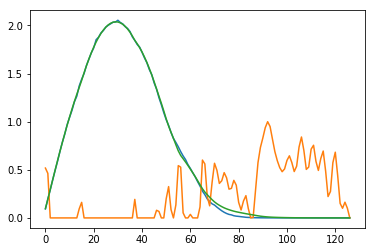

9580

In [43]:
import matplotlib.pyplot as plt
potenid = 479
plt.plot(sess.run(L3,feed_dict={X: [trainx[potenid]]})[0])
plt.plot([trainx[potenid][k]/max(trainx[potenid]) for k in range(bins - 1)])
plt.plot(trainy[potenid])
plt.show()
